# Descriptive Analysis

In [127]:
pip install control

  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260986 sha256=b00e216b3a3b583b0ec4994245ee7fa6f1020e7964aeb082cf3229bb4b62f801
  Stored in directory: c:\users\yaram\appdata\local\pip\cache\wheels\bf\56\5a\e274ccb7b84aa46ce674a219b71b73e67a0d395631aa71190c
Successfully built control



In [366]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import control
%matplotlib inline

In [367]:
df = pd.read_csv('./spotify_music_taste.csv', converters={'genres': eval})
df.drop_duplicates(subset=['artist', 'username', 'name'], ignore_index = True, inplace=True)
display(df.shape)


from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
mscaler = MinMaxScaler()

df2 = df

#Convert Decibell to magnitude
df2['date'] = pd.to_datetime(df['date'])
df2['date'] = df2['date'].dt.year
df2['loudness'] = control.db2mag(df['loudness'])
df2[['loudness']] = mscaler.fit_transform(df2[['loudness']])
df2['popularity'] /= 100
df2[['duration','tempo']] = scaler.fit_transform(df2[['duration','tempo']]) + 0.5



(1493, 16)

<Figure size 2160x720 with 0 Axes>

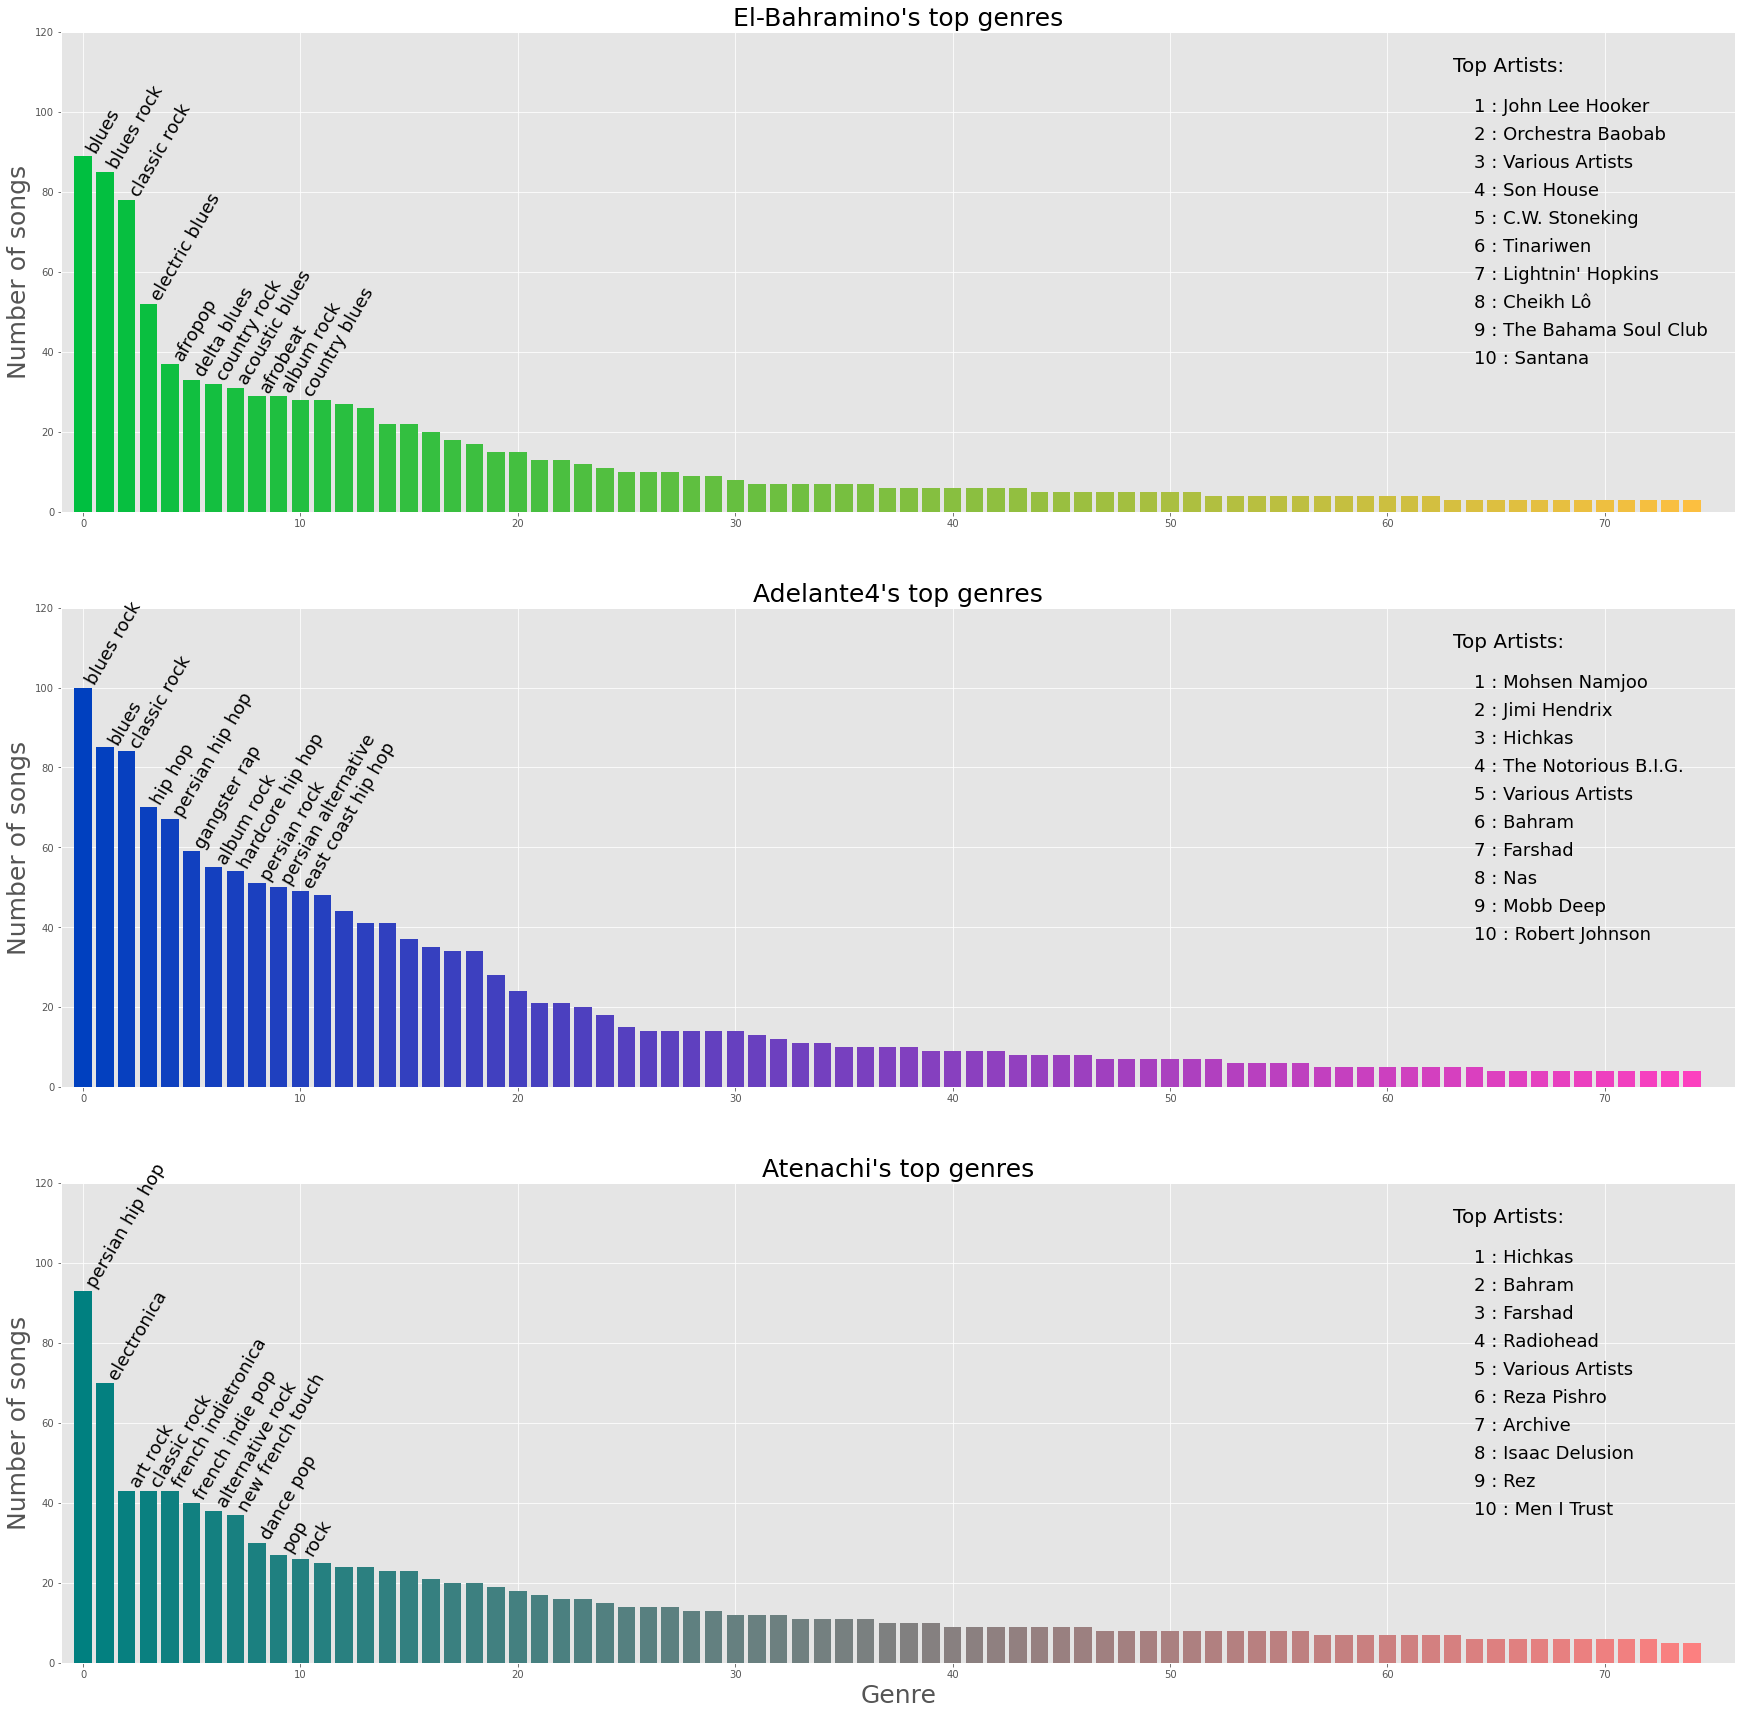

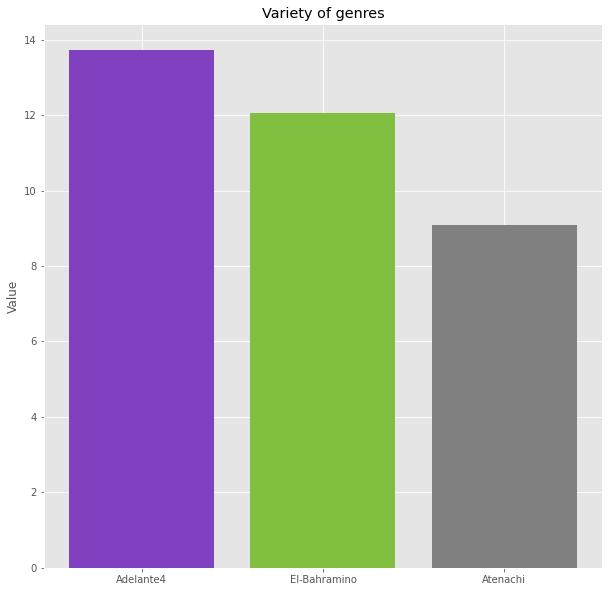

In [370]:
plt.figure(figsize=(30,10))

def plot_genres(genres):
    tmp = [genre[1] for genre in genres]
    tmp2 =  [genre[0] for genre in genres]
    print(tmp)
    plt.bar( range(75),  tmp[:75])

    for index, data in enumerate(tmp):
        plt.text(x=index, y=data +1,  s=f"{tmp2[index]}", rotation=90, fontsize=18)
        if index == 10:
            break;



top_artists = df[df.username == 'El-Bahramino'].artist.value_counts()[:10].index
genres = df[df.username == 'El-Bahramino'].genres.to_numpy().flatten()
genres = np.concatenate(genres).ravel()
unique, counts = np.unique(genres, return_counts=True)
genres = dict((zip(unique, counts)))
genres = sorted(genres.items(), key=lambda x: x[1],  reverse=True)
plt.figure(figsize=(30,30))

plt.subplot(3,1,1)
plt.xlim(-1, 76)
plt.ylim(0,120)
plt.title('El-Bahramino\'s top genres', fontsize=25)
plt.ylabel('Number of songs', fontsize=25)
tmp = [genre[1] for genre in genres]
tmp2 =  [genre[0] for genre in genres]
var_el = np.std(tmp)
plt.bar( range(75),  tmp[:75], color=[(0+i/150, 0.75,0.25) for i in range(0,150, 2)])

for index, data in enumerate(tmp):
    plt.text(x=index, y=data +1,  s=f"{tmp2[index]}", rotation=60, fontsize=18)
    if index == 10:
        break;
        
#PLot top artists
plt.text(x=63, y= 110,  s=f"Top Artists:", rotation=0, fontsize=20)
for index, data in enumerate(top_artists):
    plt.text(x=64, y= 100 - index*7,  s=f"{index + 1} : {data}", rotation=0, fontsize=18)
    if index == 10:
        break;
    

top_artists = df[df.username == 'Adelante4'].artist.value_counts()[:10].index
genres = df[df.username == 'Adelante4'].genres.to_numpy().flatten()
genres = np.concatenate(genres).ravel()
unique, counts = np.unique(genres, return_counts=True)
genres = dict((zip(unique, counts)))
genres = sorted(genres.items(), key=lambda x: x[1],  reverse=True)

plt.subplot(3,1,2)
plt.xlim(-1, 76)
plt.ylim(0,120)
plt.title('Adelante4\'s top genres', fontsize=25)
plt.ylabel('Number of songs', fontsize=25)
tmp = [genre[1] for genre in genres]
tmp2 =  [genre[0] for genre in genres]
var_ad = np.std(tmp)
plt.bar( range(75),  tmp[:75], color=[(0+i/150, 0.25,0.75) for i in range(0,150, 2)])

for index, data in enumerate(tmp):
    plt.text(x=index, y=data +1,  s=f"{tmp2[index]}", rotation=60, fontsize=18)
    if index == 10:
        break;
        
#PLot top artists
plt.text(x=63, y= 110,  s=f"Top Artists:", rotation=0, fontsize=20)
for index, data in enumerate(top_artists):
    plt.text(x=64, y= 100 - index*7,  s=f"{index + 1} : {data}", rotation=0, fontsize=18)
    if index == 10:
        break;
        
        

top_artists = df[df.username == 'Atenachi'].artist.value_counts()[:10].index
genres = df[df.username == 'Atenachi'].genres.to_numpy().flatten()
genres = np.concatenate(genres).ravel()
unique, counts = np.unique(genres, return_counts=True)
genres = dict((zip(unique, counts)))
genres = sorted(genres.items(), key=lambda x: x[1],  reverse=True)
plt.subplot(3,1,3)
plt.xlim(-1, 76)
plt.ylim(0,120)
plt.title('Atenachi\'s top genres', fontsize=25)
plt.ylabel('Number of songs', fontsize=25)
plt.xlabel('Genre', fontsize=25)
tmp = [genre[1] for genre in genres]
tmp2 =  [genre[0] for genre in genres]
var_at = np.std(tmp)
plt.bar( range(75),  tmp[:75], color=[(0+i/150, 0.5,0.5) for i in range(0,150, 2)])

for index, data in enumerate(tmp):
    plt.text(x=index, y=data +1,  s=f"{tmp2[index]}", rotation=60, fontsize=18)
    if index == 10:
        break;
        
#PLot top artists
plt.text(x=63, y= 110,  s=f"Top Artists:", rotation=0, fontsize=20)
for index, data in enumerate(top_artists):
    plt.text(x=64, y= 100 - index*7,  s=f"{index + 1} : {data}", rotation=0, fontsize=18)
    if index == 10:
        break;
        
plt.savefig('genres.png')



#print("Top Chart")
#print(df[df.username.isna()].artist.value_counts()[:5])
#genres = df[df.username.isna()].genres.to_numpy().flatten()
#genres = np.concatenate(genres).ravel()
#unique, counts = np.unique(genres, return_counts=True)
#genres = dict((zip(unique, counts)))
#genres = sorted(genres.items(), key=lambda x: x[1],  reverse=True)
#print(genres[:10])
#
#plt.subplot(4,1,4)
#tmp = [genre[1] for genre in genres]
#tmp2 =  [genre[0] for genre in genres]
#var_to = np.std(tmp)
#print(tmp)
#plt.bar( range(50),  tmp[:50])
#
#
#for index, data in enumerate(tmp):
#    plt.text(x=index, y=data +1,  s=f"{tmp2[index]}", rotation=90, fontsize=18)
#    if index == 10:
#        break;
#


plt.figure(figsize=(10,10))
plt.bar(['Adelante4', 'El-Bahramino', 'Atenachi'], [var_ad, var_el ,var_at], color=[(0.5, 0.25, 0.75),(0.5,0.75,0.25),(0.5, 0.5, 0.5)]);
plt.title('Variety of genres', fontsize=25)
plt.ylabel('Value',  fontsize=25)
plt.savefig('std_genres.png')

In [371]:
el_bahramino_features = df2[df2.username=='El-Bahramino'].loc[:,['explicit', 'popularity', 'danceability','loudness',
                           'acousticness', 'energy', 'valence', 'speechiness', 'tempo']].reset_index().drop(columns='index')
el_bahramino_date = df2[df2.username=='El-Bahramino'].loc[:,['date']].reset_index().drop(columns='index')

adelante4_features = df2[df2.username=='Adelante4'].loc[:,['explicit', 'popularity', 'danceability','loudness', 
                           'acousticness', 'energy', 'valence', 'speechiness', 'tempo']].reset_index().drop(columns='index')
adelante4_date = df2[df2.username=='Adelante4'].loc[:,['date']].reset_index().drop(columns='index')

atenachi_features = df2[df2.username=='Atenachi'].loc[:,['explicit', 'popularity', 'danceability','loudness', 
                           'acousticness', 'energy', 'valence', 'speechiness', 'tempo']].reset_index().drop(columns='index')
atenachi_date = df2[df2.username=='Atenachi'].loc[:,['date']].reset_index().drop(columns='index')

top_features = df2[df2.username.isna()].loc[:,['explicit', 'popularity', 'danceability','loudness', 
                           'acousticness', 'energy', 'valence', 'speechiness', 'tempo']].reset_index().drop(columns='index')
top_date =  df2[df2.username.isna()].loc[:,['date']].reset_index().drop(columns='index')

In [93]:
df

,artist,name,username,explicit,duration,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,genres,date
0,Tamikrest,Tisnant an Chatma,El-Bahramino,False,290800,42,0.329,-5.060,156.898,0.331,0.887,0.565,0.0850,0.0516,"[afropop, desert blues, malian blues, mande po...",2013-09-13
1,Ali Farka Touré,Ai Du (with Ry Cooder),El-Bahramino,False,429973,58,0.570,-17.168,151.780,0.306,0.225,0.408,0.0689,0.0290,"[afrobeat, afropop, desert blues, malian blues...",1994-03-28
2,Ali Farka Touré,56,El-Bahramino,False,417186,44,0.448,-10.141,89.475,0.807,0.411,0.471,0.1210,0.0292,"[afrobeat, afropop, desert blues, malian blues...",2010-02-22
3,Ali Farka Touré,Diaraby,El-Bahramino,False,446826,0,0.555,-18.638,142.700,0.783,0.275,0.335,0.0829,0.0359,"[afrobeat, afropop, desert blues, malian blues...",1994-03-28
4,Kyuss,Space Cadet,El-Bahramino,True,422533,58,0.461,-16.225,169.675,0.449,0.168,0.309,0.2670,0.0420,"[alternative metal, alternative rock, grunge, ...",1994-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,Clairo,Sofia,NaN,False,188386,90,0.744,-9.805,112.997,0.598,0.619,0.641,0.2310,0.0390,"[bedroom pop, boston indie]",2019-08-02
1489,Ashnikko,Daisy,NaN,True,146523,90,0.834,-6.143,121.876,0.235,0.663,0.774,0.3720,0.1330,"[electropop, escape room, pop]",2020-07-09
1490,DaBaby,ROCKSTAR (feat. Roddy Ricch),NaN,True,181733,94,0.746,-7.956,89.977,0.247,0.690,0.497,0.1010,0.1640,"[north carolina hip hop, rap]",2020-04-17
1491,KAROL G,BICHOTA,NaN,True,178946,96,0.863,-4.158,163.908,0.212,0.666,0.838,0.1030,0.1520,"[latin, reggaeton, reggaeton colombiano, trap ...",2020-10-23


[0.00621118 0.35819876 0.56015839 0.33647445 0.56300067 0.41499037
 0.53723602 0.0602087  0.48211158 0.00621118]
['explicit', 'popularity', 'danceability', 'loudness', 'acousticness', 'energy', 'valence', 'speechiness', 'tempo']


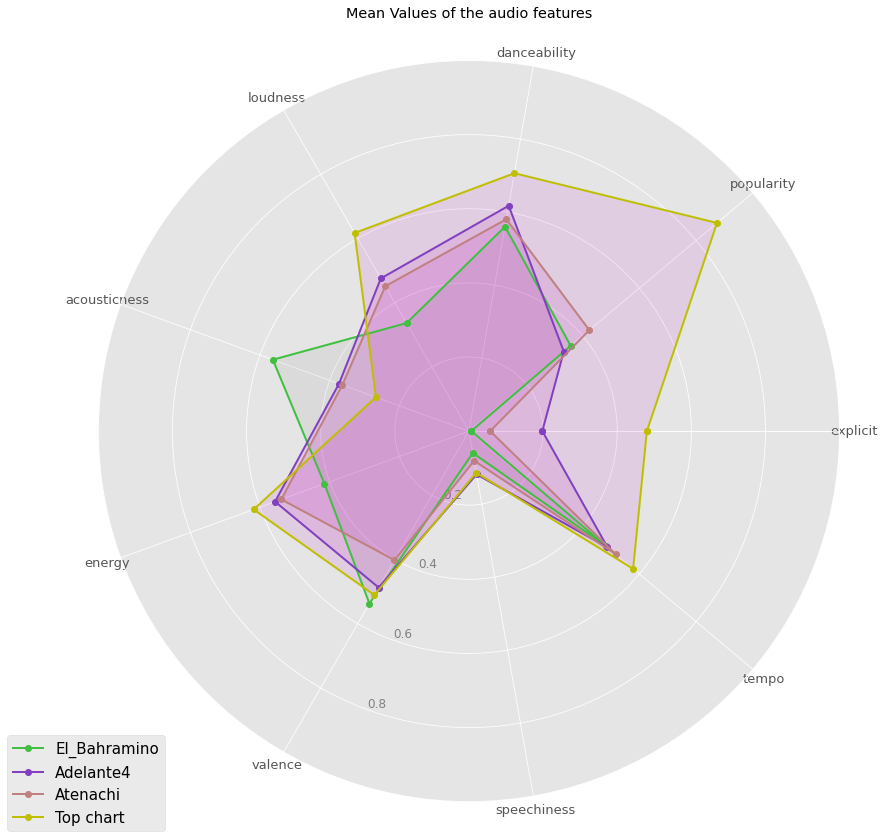

In [372]:

labels= list(el_bahramino_features)[:]
el_bahramino_stats= el_bahramino_features.mean().tolist()
adelante4_stats= adelante4_features.mean().tolist()
atenachi_stats= atenachi_features.mean().tolist()
top_stats= top_features.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
el_bahramino_stats=np.concatenate((el_bahramino_stats,[el_bahramino_stats[0]]))
adelante4_stats =np.concatenate((adelante4_stats,[adelante4_stats[0]])) 
atenachi_stats =np.concatenate((atenachi_stats,[atenachi_stats[0]])) 
top_stats =np.concatenate((top_stats,[top_stats[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
print(el_bahramino_stats)
print(labels)

fig=plt.figure(figsize = (30,30))




ax = fig.add_subplot(221, polar=True)
ax.plot(angles, el_bahramino_stats, 'o-', linewidth=2, label = "El_Bahramino", color= (0.25,0.75,0.25))
ax.fill(angles, el_bahramino_stats, alpha=0.1, facecolor='gray')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)

ax.plot(angles, adelante4_stats, 'o-', linewidth=2, label = "Adelante4", color = (0.5, 0.25, 0.75))
ax.fill(angles, adelante4_stats, alpha=0.1, facecolor='m' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

ax.plot(angles, atenachi_stats, 'o-', linewidth=2, label = "Atenachi", color = (0.75, 0.5, 0.5))
ax.fill(angles, atenachi_stats, alpha=0.1, facecolor='m' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

ax.plot(angles, top_stats, 'o-', linewidth=2, label = "Top chart", color = 'y')
ax.fill(angles, top_stats, alpha=0.1, facecolor='m' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

plt.savefig('avg')


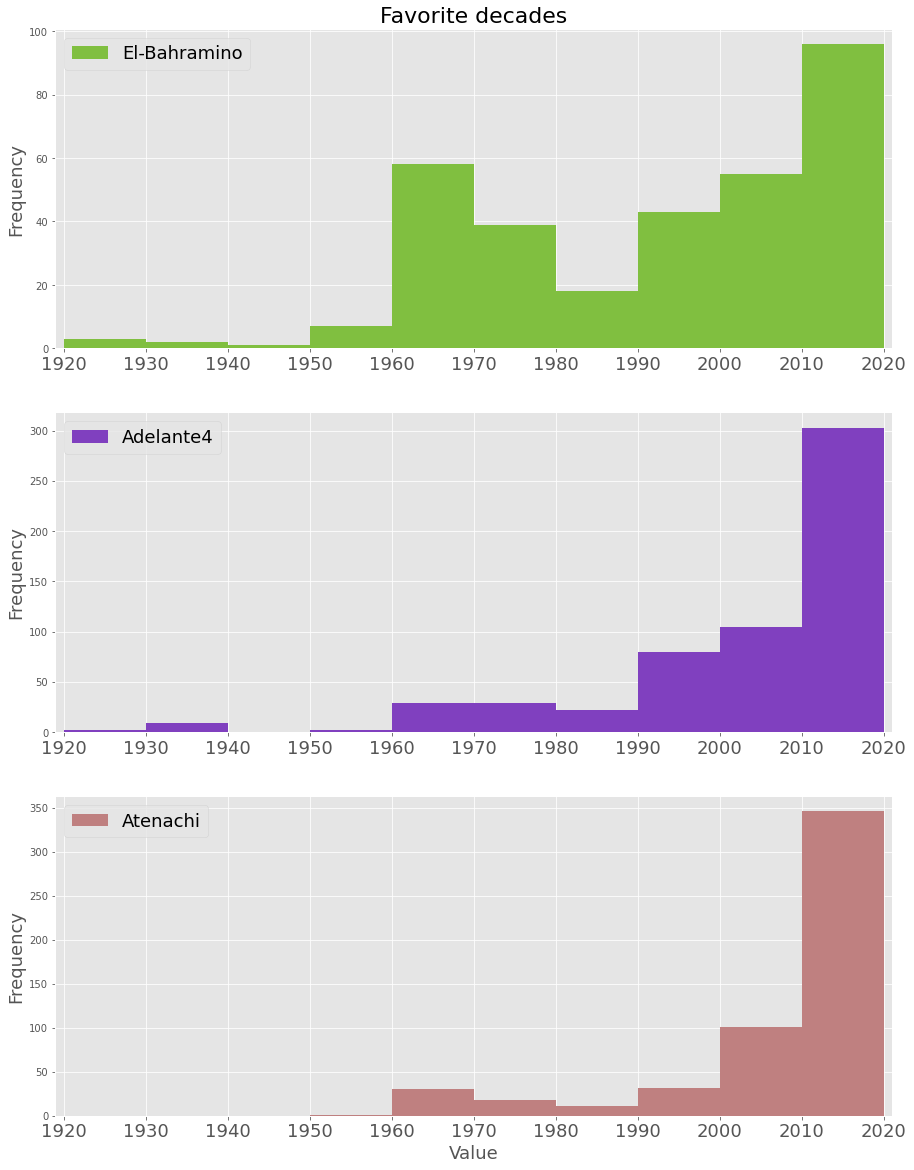

In [398]:
plt.figure(figsize=(15,20))
plt.subplot(3,1,1)
plt.title('Favorite decades', fontsize=22)
plt.hist(el_bahramino_date.date, bins=range(1920, 2021, 10), color=(0.50,0.75,0.25), label='El-Bahramino')
plt.legend(fontsize=18)
plt.xlim((1919,2021))
plt.xticks(range(1920, 2021, 10), fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.subplot(3,1,2)
plt.hist(adelante4_date.date, bins=range(1920, 2021, 10), color=(0.50,0.25,0.75), label='Adelante4')
plt.legend(fontsize=18)
plt.xlim((1919,2021))
plt.xticks(range(1920, 2021, 10), fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.subplot(3,1,3)
plt.hist(atenachi_date.date, bins=range(1920, 2021, 10),color=(0.75,0.5,0.5) , label='Atenachi')
plt.xlim((1919,2021))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Value', fontsize=18)
plt.xticks(range(1920, 2021, 10), fontsize=18)
plt.xlim((1919,2021))
plt.legend(fontsize=18)

plt.savefig('favdecs.png')


C:\Users\yaram\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\yaram\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\yaram\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


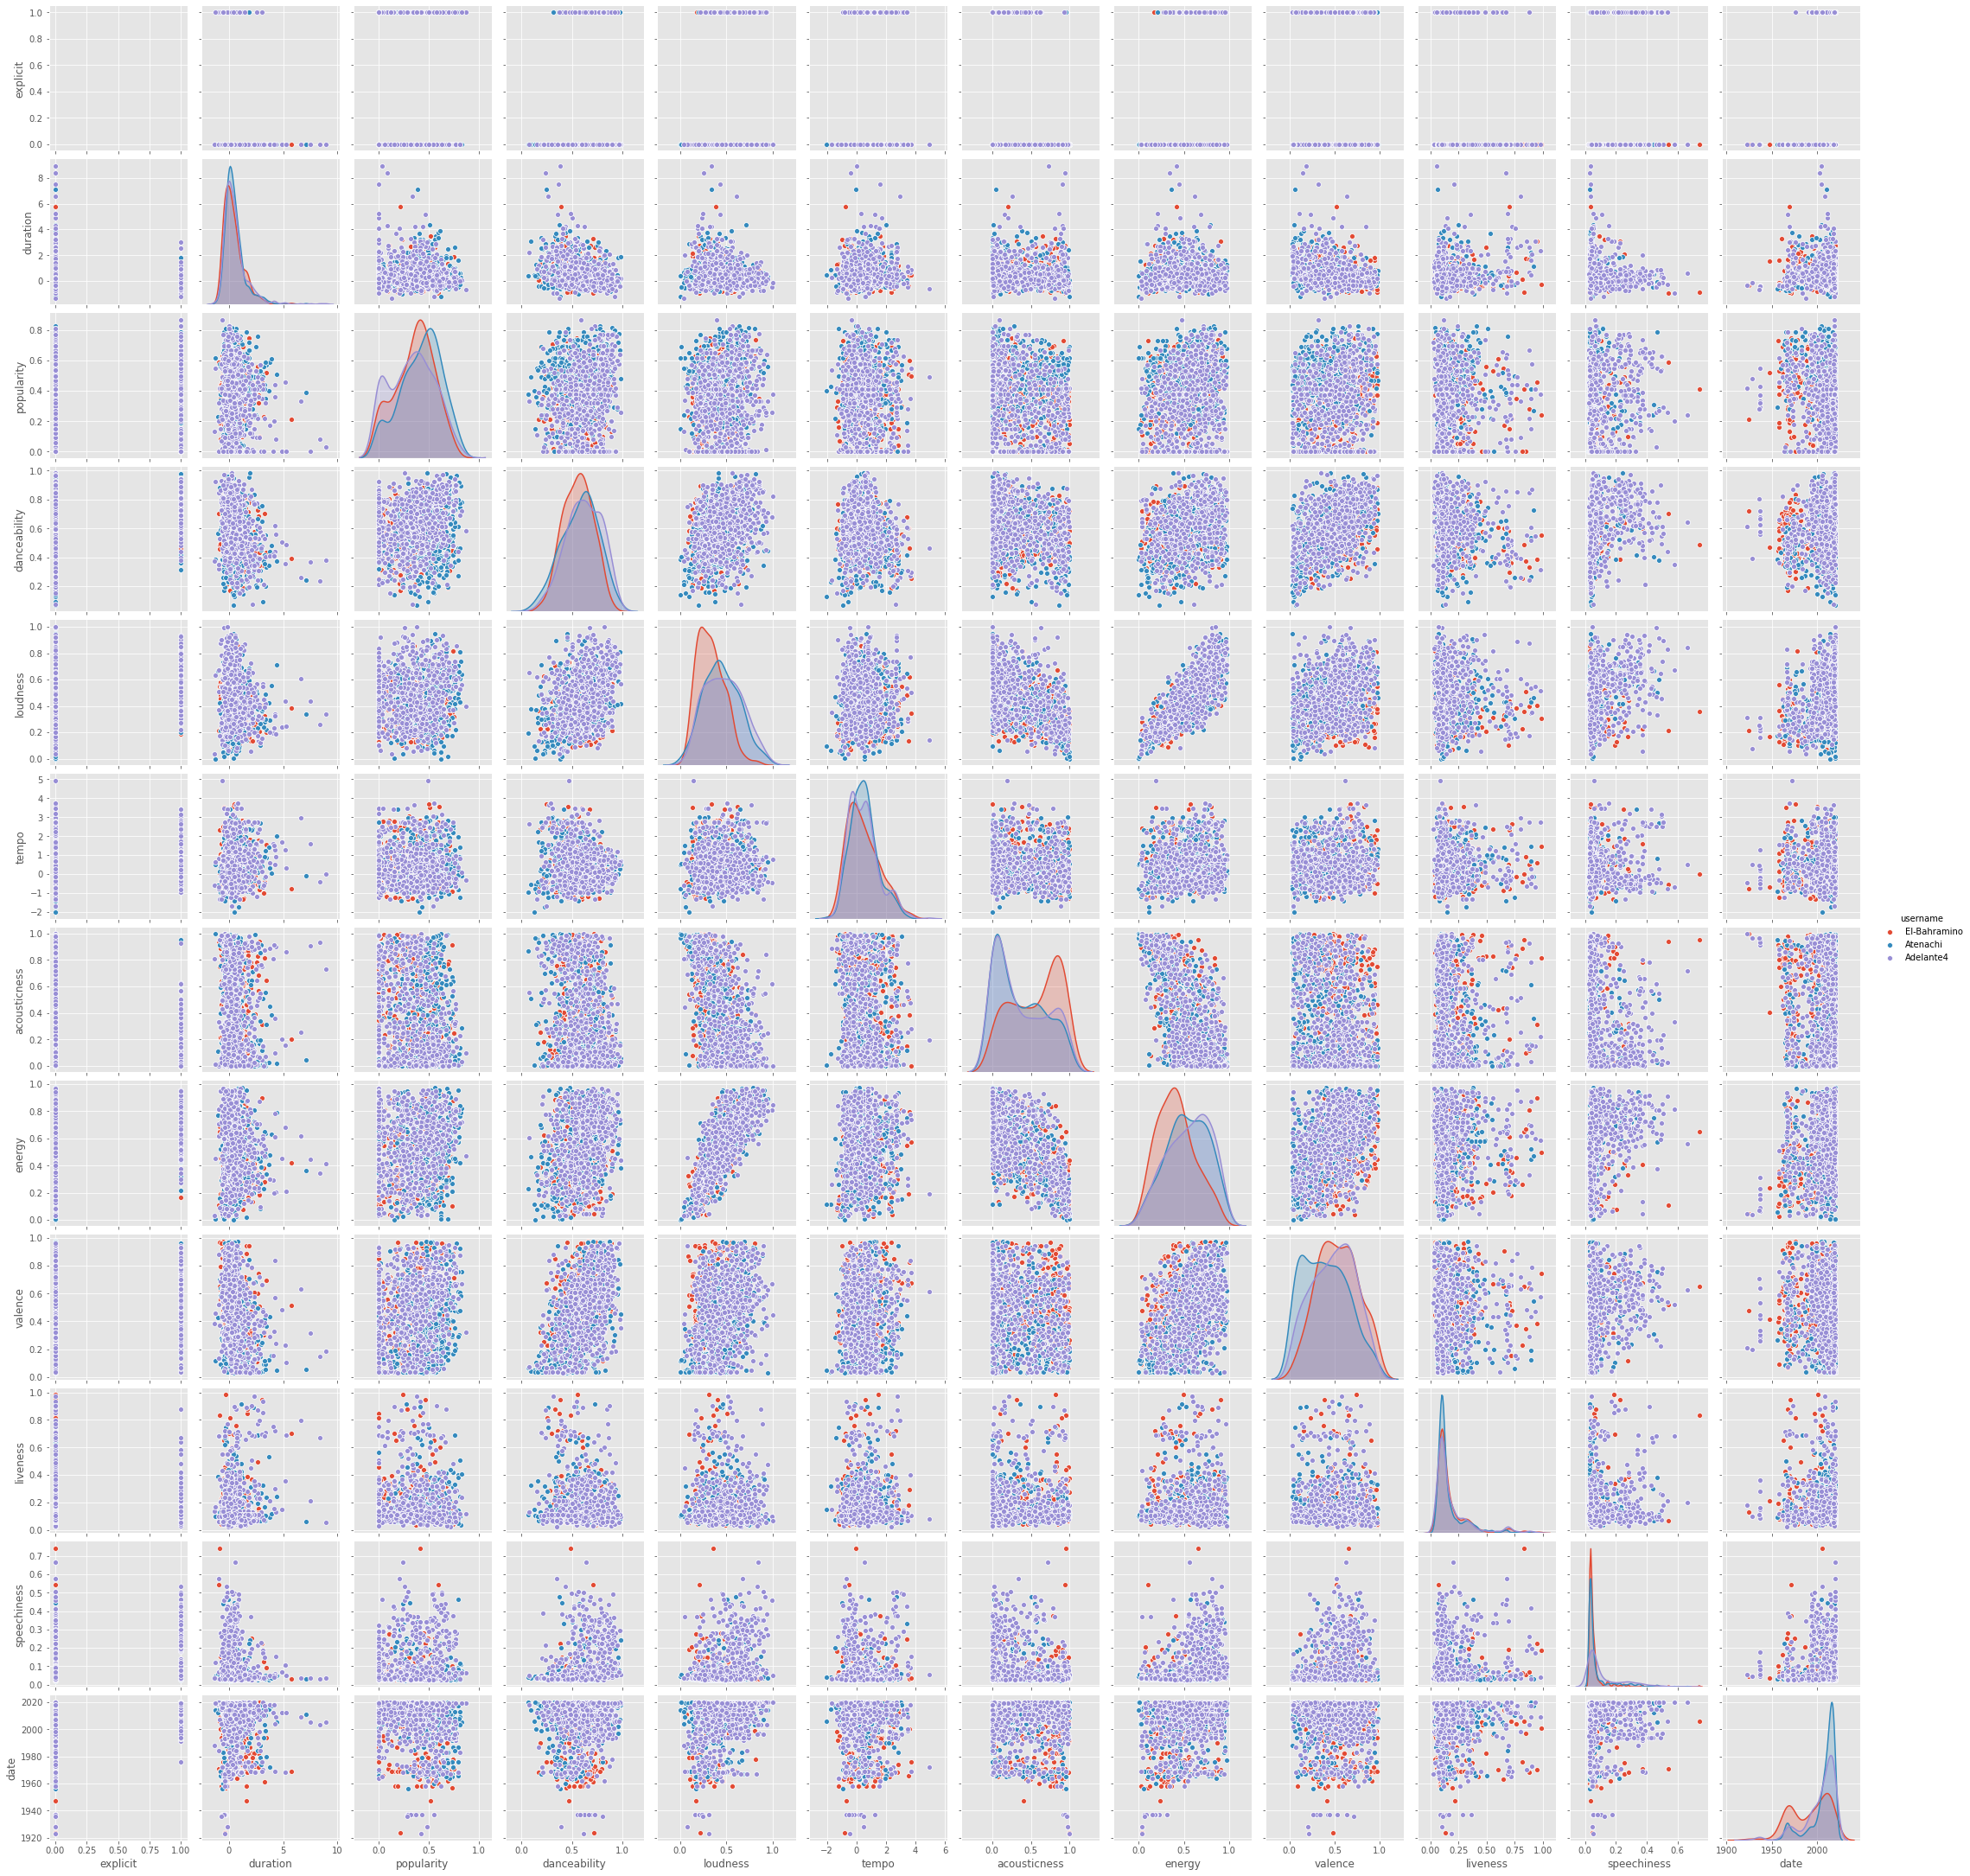

In [188]:
mus = sns.pairplot(df, hue='username')

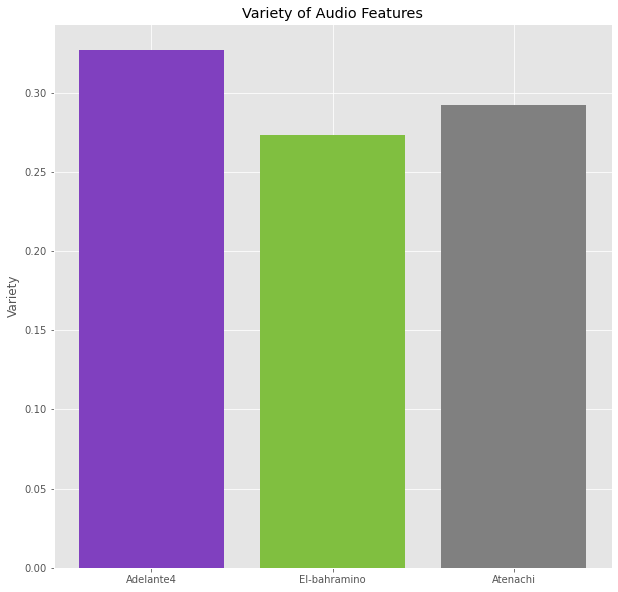

<Figure size 432x288 with 0 Axes>

In [396]:
plt.figure(figsize=(10,10))

data = [adelante4_features.std().mean(), el_bahramino_features.std().mean(), atenachi_features.std().mean()]
plt.bar(['Adelante4', 'El-bahramino',  'Atenachi'], data, color=[(0.5, 0.25, 0.75),(0.5,0.75,0.25),(0.5, 0.5, 0.5)])
plt.ylabel('Variety')
plt.title('Variety of Audio Features')
plt.show()

plt.savefig('varaud.png')

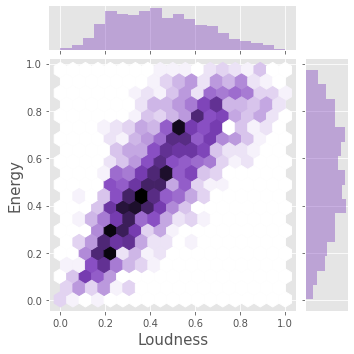

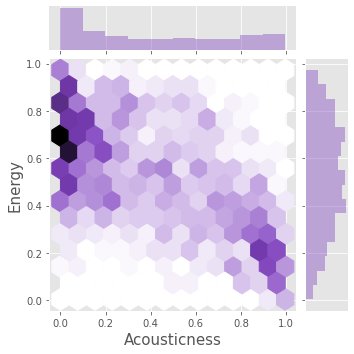

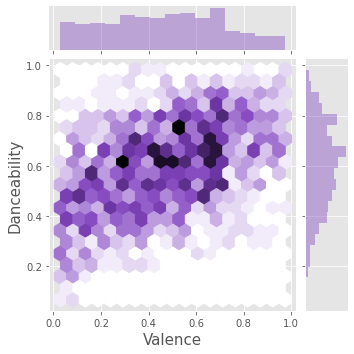

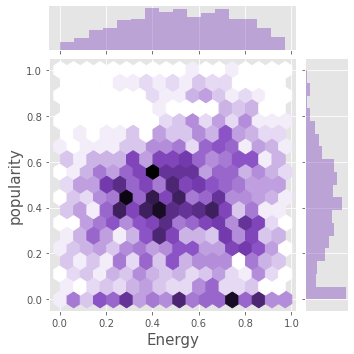

In [374]:
plt.rc("legend", fontsize=15)
sns.jointplot(y=df['energy'], x=df['loudness'], kind="hex", color=(0.50,0.25,0.75), size=5).set_axis_labels("Loudness", "Energy", fontsize=15)
plt.savefig('energy_loud.png')
sns.jointplot(y=df['energy'], x=df['acousticness'], kind="hex", color=(0.50,0.25,0.75), size=5).set_axis_labels("Acousticness", "Energy", fontsize=15)
plt.savefig('energy_acoustic.png')
sns.jointplot(y=df['danceability'], x=df['valence'], kind="hex", color=(0.50,0.25,0.75), size=5).set_axis_labels("Valence", "Danceability", fontsize=15)
plt.savefig('dance_valence.png')
sns.jointplot(y=df['popularity'], x=df['energy'], kind="hex",color=(0.50,0.25,0.75), size=5).set_axis_labels("Energy", "popularity", fontsize=15)
plt.savefig('popularity_energy.png')

In [375]:
#Decades stuff

df3 = pd.read_csv('./spotify_decade.csv', converters={'genres': eval})
df3['date'] = pd.to_datetime(df3['date'])
df3['date'] = df3['date'].dt.year / 10 
df3['date'] =  (df3['date'].astype(int) * 10 )
df3

,artist,name,username,explicit,duration,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,genres,date
0,Bill Haley & His Comets,(We're Gonna) Rock Around The Clock,NaN,False,129893,64,0.811,-6.317,90.686,0.20500,0.859,0.784,0.0761,0.1680,"[adult standards, brill building pop, rock-and...",1950
1,Jackie Wilson,Reet Petite,NaN,False,169240,60,0.664,-6.526,84.345,0.44700,0.660,0.873,0.2980,0.1300,"[adult standards, brill building pop, chicago ...",1950
2,Jackie Wilson,Lonely Teardrops,NaN,False,166213,51,0.524,-8.894,137.133,0.40600,0.478,0.843,0.7400,0.1180,"[adult standards, brill building pop, chicago ...",1950
3,Jackie Wilson,I Get The Sweetest Feeling,NaN,False,178373,59,0.684,-9.234,123.532,0.77800,0.482,0.749,0.1480,0.0371,"[adult standards, brill building pop, chicago ...",1960
4,Jackie Wilson,I Get The Sweetest Feeling,NaN,False,178373,59,0.684,-9.234,123.532,0.77800,0.482,0.749,0.1480,0.0371,"[adult standards, brill building pop, chicago ...",1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Jason Derulo,Want to Want Me,NaN,False,207719,76,0.775,-5.508,114.025,0.00906,0.680,0.656,0.1090,0.0629,"[dance pop, pop, pop dance, pop rap, post-teen...",2010
796,Hozier,Take Me To Church,NaN,False,241688,82,0.566,-5.303,128.945,0.63400,0.664,0.437,0.1160,0.0464,"[irish singer-songwriter, modern rock, pop]",2010
797,OMI,Cheerleader - Felix Jaehn Remix Radio Edit,NaN,False,180565,76,0.782,-6.237,118.016,0.16600,0.685,0.603,0.1600,0.0309,"[dance pop, pop dance]",2010
798,Mark Ronson,Uptown Funk (feat. Bruno Mars),NaN,False,269666,82,0.856,-7.223,114.988,0.00801,0.609,0.928,0.0344,0.0824,"[dance pop, pop, pop dance]",2010


In [383]:
features = df3.loc[:,['explicit', 'popularity', 'danceability','loudness',
                           'acousticness', 'energy', 'valence', 'liveness', 'speechiness', 'tempo', 'duration', 'date']].reset_index().drop(columns='index')
features = features.drop(features[features['date'] == 2020].index)

<Figure size 1080x1080 with 0 Axes>

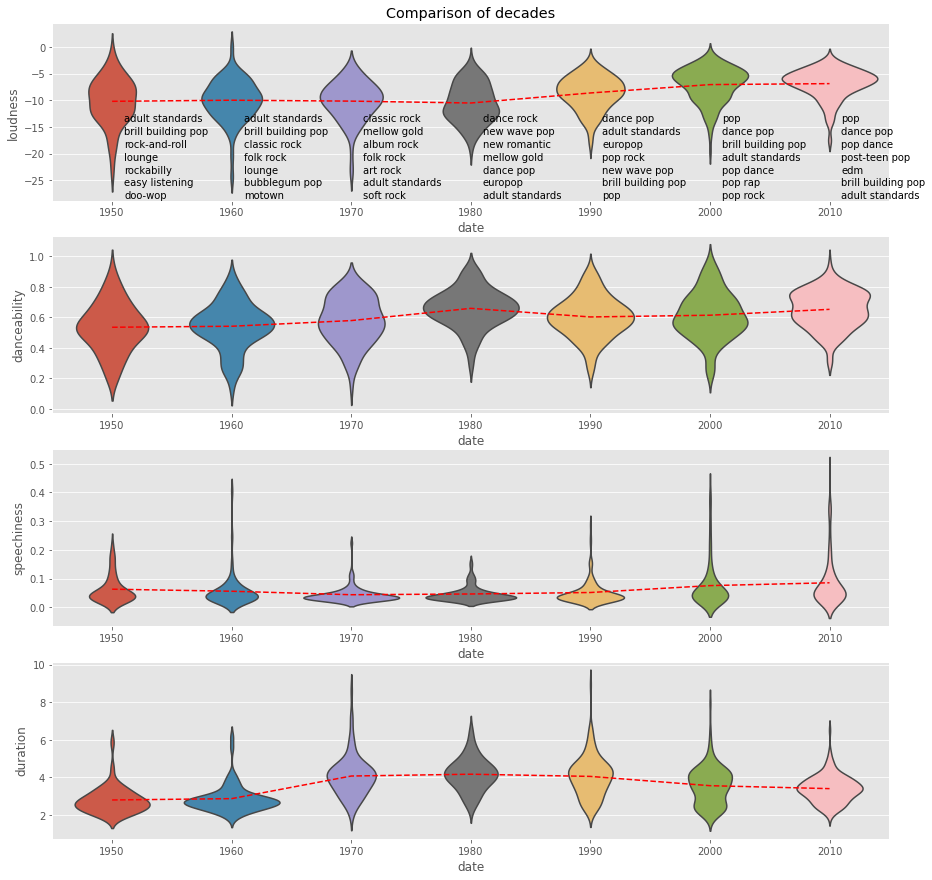

<Figure size 1080x1080 with 0 Axes>

In [395]:
plt.figure(figsize=(15,15))


plt.subplot(4,1,1)   
plt.title('Comparison of decades')

for index, decade in enumerate(range(1950,2020,10)):
    genres = df3[df3.date == decade].genres.to_numpy().flatten()
    genres = np.concatenate(genres, axis=0)

    unique, counts = np.unique(genres, return_counts=True)
    genres = dict((zip(unique, counts)))
    genres = sorted(genres.items(), key=lambda x: x[1],  reverse=True)

    tmp = [genre[1] for genre in genres]
    tmp2 =  [genre[0] for genre in genres]

    for i in range(7): 
        plt.text(x=index + 0.1, y= -14 - i*2.4,  s=f"{tmp2[i]}", rotation=0, fontsize=10)
        
plt.plot(range(7), features[['date', 'loudness']].groupby(features['date']).mean()['loudness'], 'r--')     
sns.violinplot(x =features['date'], 
             y =features['loudness'], inner=None)
plt.subplot(4,1,2)  
plt.plot(range(7), features[['date', 'danceability']].groupby(features['date']).mean()['danceability'], 'r--')     
sns.violinplot(x =features['date'], 
             y =features['danceability'], inner=None)
plt.subplot(4,1,3)  
plt.plot(range(7), features[['date', 'speechiness']].groupby(features['date']).mean()['speechiness'], 'r--')
sns.violinplot(x =features['date'], 
             y =features['speechiness'], inner=None)
plt.subplot(4,1,4)  
plt.plot(range(7), features[['date', 'duration']].groupby(features['date']).mean()['duration']/60000, 'r--')
sns.violinplot(x =features['date'], 
             y =features['duration']/60000, inner=None)

plt.savefig('decadecom.png')
plt.figure(figsize=(15,15))
